# Annotation

Eng: Here we are going to make a Machine Learning Model Creator, that will detect tumors on MRI Scan Images. 

---

Ukr: Тут ми створимо модель машинного навчання, яка буде виявляти пухлини на зображеннях МРТ.

# Required Packages

In [35]:
import sys 
!{sys.executable} -m pip install numpy pandas seaborn tensorflow keras scikit-learn tqdm pydot graphviz

Eng: Since we will be working with data, machine learning process and images, we are going to use: numpy, pandas, seaborn, tensorflow, keras, scikit-learn, glob, tqdm;

---

Ukr: Оскільки ми будемо працювати з даними, процесом машинного навчання та зображеннями, ми будемо використовувати: numpy, pandas, seaborn, tensorflow, keras, scikit-learn, glob, tqdm;

# Read Dataset

Eng: First of all we have to form a dataset for our ML model, for this we are going to parse through the directories and makeup a new dataset, that's served as dataframe with image path and label fields.

---

Ukr: Перш за все, ми повинні сформувати набір даних для нашої ML-моделі, для цього ми проаналізуємо каталоги і створимо новий набір даних, який буде слугувати фреймом даних з полем шляху до зображення та полем мітки.

## Importing modules

In [36]:
import numpy as np
import pandas as pd

from glob import glob

from os import listdir
from os.path import dirname

## Dataset overview

In [37]:
images_dataset = "../data/"

pd.DataFrame(
    listdir(images_dataset), 
    columns=['Files_Name']    
)

,Files_Name
0,negative
1,positive


## Dataset creation

In [38]:
files = [
    file for file in glob(
        images_dataset + "//*//*"
    )
]

np.random.shuffle(
    files
)

labels = [
    dirname(file).split("/")[-1]
    for file in files
]

data = zip(
    files, labels
)

dataframe = pd.DataFrame(
    data,
    columns=[
        "Image",
        "Label"
    ]
)

dataframe

,Image,Label
0,../data/negative/34.jpg,negative
1,../data/negative/27.jpg,negative
2,../data/positive/0.jpg,positive
3,../data/negative/66.jpg,negative
4,../data/negative/31.jpg,negative
...,...,...
222,../data/positive/68.jpg,positive
223,../data/negative/95.jpg,negative
224,../data/positive/123.jpg,positive
225,../data/positive/27.jpg,positive


# Visualization

Eng: Now we are going to plot the dataset, and see how we can proceed the information in the future.

---

Ukr: Зараз ми побудуємо графік набору даних і подивимося, як ми можемо використовувати інформацію в майбутньому.

## Importing modules

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

## Data plotting

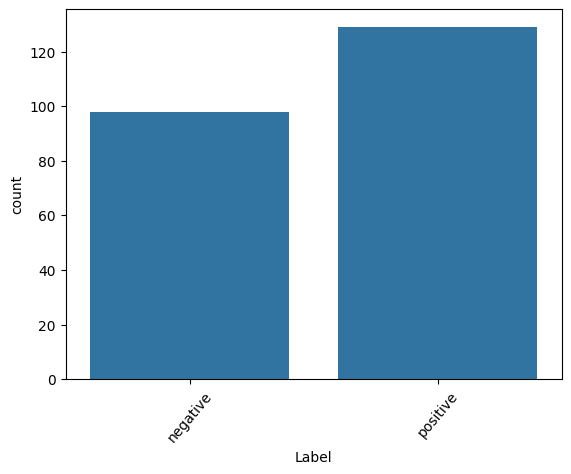

In [40]:
sns.countplot(
    x=dataframe["Label"]
)

plt.xticks(
    rotation=50
)

plt.savefig(
    '../output/dataset_structure.png'
)

# Dataset splitting

Eng: Preparing the data for machine learning manipulations.

---

Ukr: Підготовка даних для маніпуляцій з машинним навчанням.

## Preprocessing variables

In [41]:
data_dir = images_dataset

batch_size = 32
target_size = (224, 224)
validation_split = 0.2

## Importing modules

In [42]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

## Train && validation

In [43]:
train = image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size
)

validation = image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size
)

Found 227 files belonging to 2 classes.
Using 182 files for training.
Found 227 files belonging to 2 classes.
Using 45 files for validation.


In [44]:
class_names = train.class_names
class_names

['negative', 'positive']

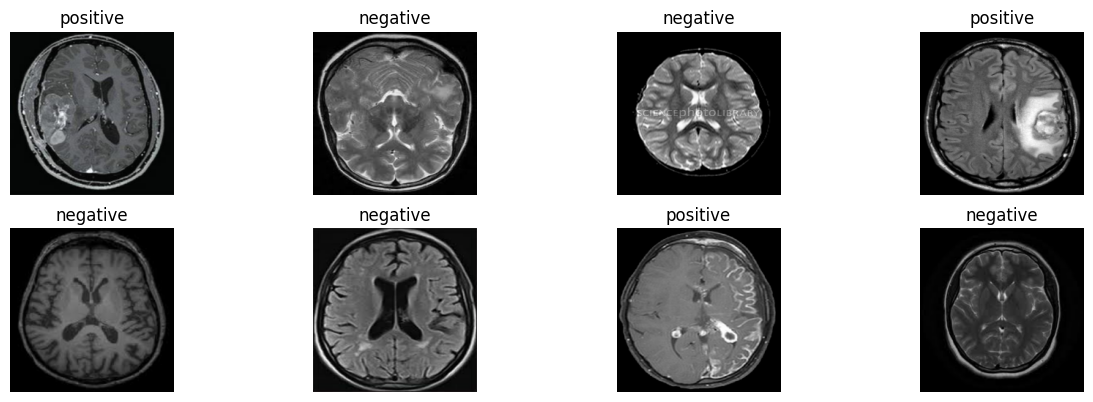

In [45]:
plt.figure(
    figsize=(15, 20)
)

for images, labels in train.take(1):
    for _ in range(8):
        ax = plt.subplot(
            8, 4, _ + 1
        )
        plt.imshow(images[_].numpy().astype(
            "uint8"
        ))

        plt.title(
            class_names[labels[_]]
        )
        plt.axis("off")

# Modeling

Eng: The most interesting process has come, the training of the model.

---

Ukr: Настав найцікавіший процес - навчання моделі.

## Importing modules

In [46]:
from keras.layers import (
    Dense, Dropout, Flatten
)
from keras.models import Sequential
from keras.callbacks import (
    EarlyStopping, ModelCheckpoint)

from tensorflow.nn import softmax

from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import EfficientNetV2B0

## Model initialization

In [47]:
model = EfficientNetV2B0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

model.trainable = False

keras_model = Sequential()

keras_model.add(
    model
)
keras_model.add(
    Flatten()
)
keras_model.add(
    Dropout(0.5)
)
keras_model.add(
    Dense(
        10, activation=softmax
    )
)

keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 7, 7, 1280)        5919312   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_1 (Dropout)         (None, 62720)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                627210    
                                                                 
Total params: 6546522 (24.97 MB)
Trainable params: 627210 (2.39 MB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


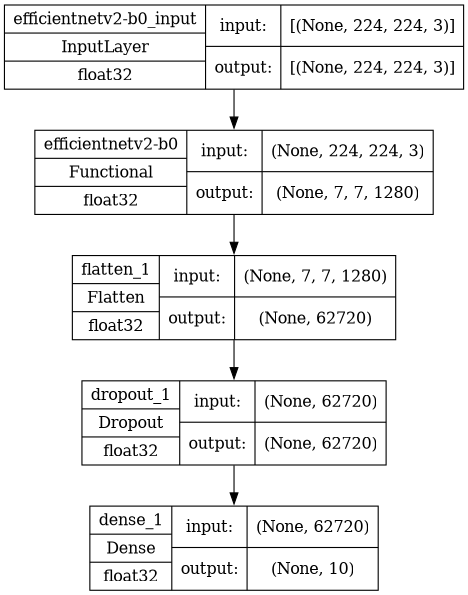

In [48]:
'''
Additional libraries are required, like: pydot and graphviz
'''

plot_model(
    keras_model,
    to_file='../output/model_plotting.png',
    show_shapes=True,
    show_layer_names=True,
    show_dtype=True,
    dpi=80
)

## Keras Manipualtion

In [49]:
checkpoint = ModelCheckpoint(
    "../output/models/checkpoints/keras_model.h5",
    save_best_only=True
)

In [50]:
early_stopping  = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

In [51]:
keras_model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

hist = keras_model.fit(
    train, epochs=20,
    validation_data=validation,
    callbacks=[
        checkpoint, 
        early_stopping
    ]
)

Epoch 1/20
6/6 [==============================] - ETA: 0s - loss: 1.3527 - accuracy: 0.5714

/home/nietzsche/oncoscope/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 17s 2s/step - loss: 1.3527 - accuracy: 0.5714 - val_loss: 0.8029 - val_accuracy: 0.8222
Epoch 2/20
6/6 [==============================] - 11s 2s/step - loss: 0.5825 - accuracy: 0.8352 - val_loss: 0.1468 - val_accuracy: 0.9333
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 0.1691 - accuracy: 0.9560 - val_loss: 0.0815 - val_accuracy: 0.9556
Epoch 4/20
6/6 [==============================] - 10s 2s/step - loss: 0.1160 - accuracy: 0.9560 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 9s 2s/step - loss: 0.0481 - accuracy: 0.9835 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 9s 2s/step - loss: 0.0422 - accuracy: 0.9780 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 8s 2s/step - loss: 0.0351 - accuracy: 0.9835 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 8/20
6/6 [==============================] 

## Scoring model

In [52]:
score, acc = keras_model.evaluate(validation)

print("\nTest Loss: {:.3f}".format(score * 100))
print("-"*25)
print(f"Test Accuracy: {acc * 100}")

2/2 [==============================] - 2s 747ms/step - loss: 7.4621e-06 - accuracy: 1.0000

Test Loss: 0.001
-------------------------
Test Accuracy: 100.0


In [53]:
hist_ = pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.352705,0.571429,0.802877,0.822222
1,0.582515,0.835165,0.146789,0.933333
2,0.169141,0.956044,0.081525,0.955556
3,0.115962,0.956044,0.020903,1.000000
4,0.048111,0.983516,0.001039,1.000000
5,0.042187,0.978022,0.001112,1.000000
6,0.035121,0.983516,0.007435,1.000000
7,0.010069,0.994505,0.000572,1.000000
8,0.007134,0.994505,0.000356,1.000000
9,0.024123,0.994505,0.001098,1.000000


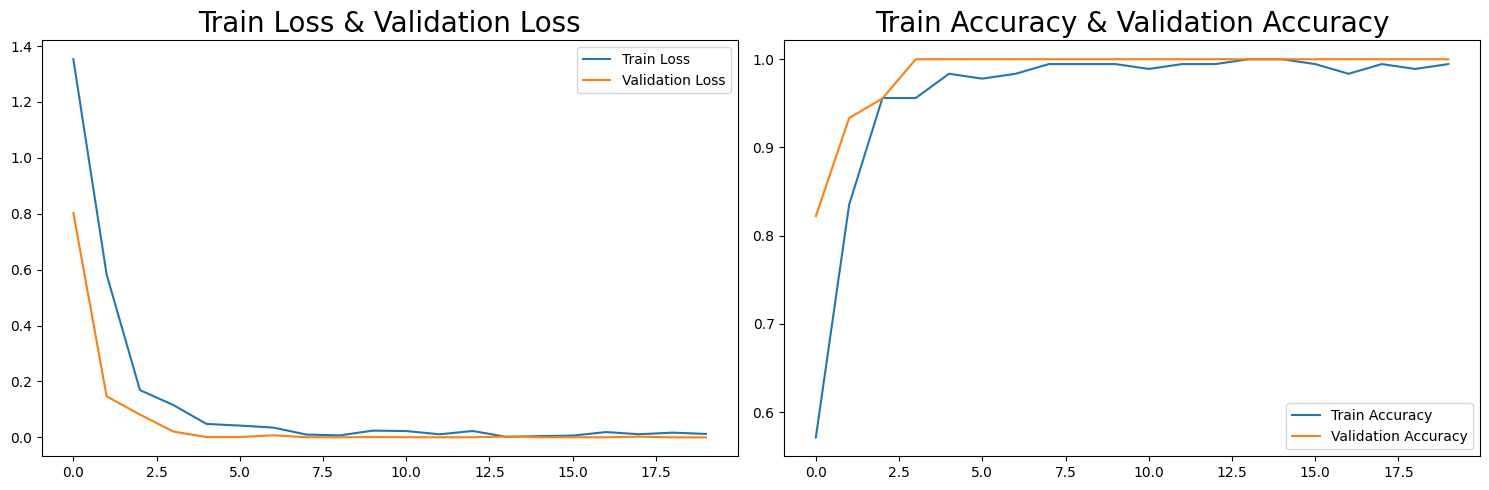

In [54]:
train_loss = hist_['loss']
val_loss = hist_['val_loss']
train_accuracy = hist_['accuracy']
val_accuracy = hist_['val_accuracy']

fig, axes = plt.subplots(
    1, 2, 
    figsize=(15, 5))

axes[0].plot(
    train_loss, 
    label='Train Loss'
)
axes[0].plot(
    val_loss, 
    label='Validation Loss'
)
axes[0].set_title(
    'Train Loss & Validation Loss', 
    fontsize=20
)
axes[0].legend()

axes[1].plot(
    train_accuracy, 
    label='Train Accuracy'
)
axes[1].plot(
    val_accuracy, 
    label='Validation Accuracy'
)
axes[1].set_title(
    'Train Accuracy & Validation Accuracy', 
    fontsize=20
)
axes[1].legend()

plt.tight_layout()

plt.savefig(
    '../output/model_training.png'
)

plt.show()

In [55]:
x_val, y_val, y_pred = [], [], []

for images, labels in validation:
    y_val.extend(
        labels.numpy()
    )
    x_val.extend(
        images.numpy()
    )

predictions = keras_model.predict(
    np.array(x_val)
)

for predection in predictions:
    y_pred.append(
        np.argmax(predection)
    )

dataframe = pd.DataFrame()

dataframe["Actual"], dataframe["Prediction"] = y_val, y_pred

dataframe

2/2 [==============================] - 1s 169ms/step


,Actual,Prediction
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


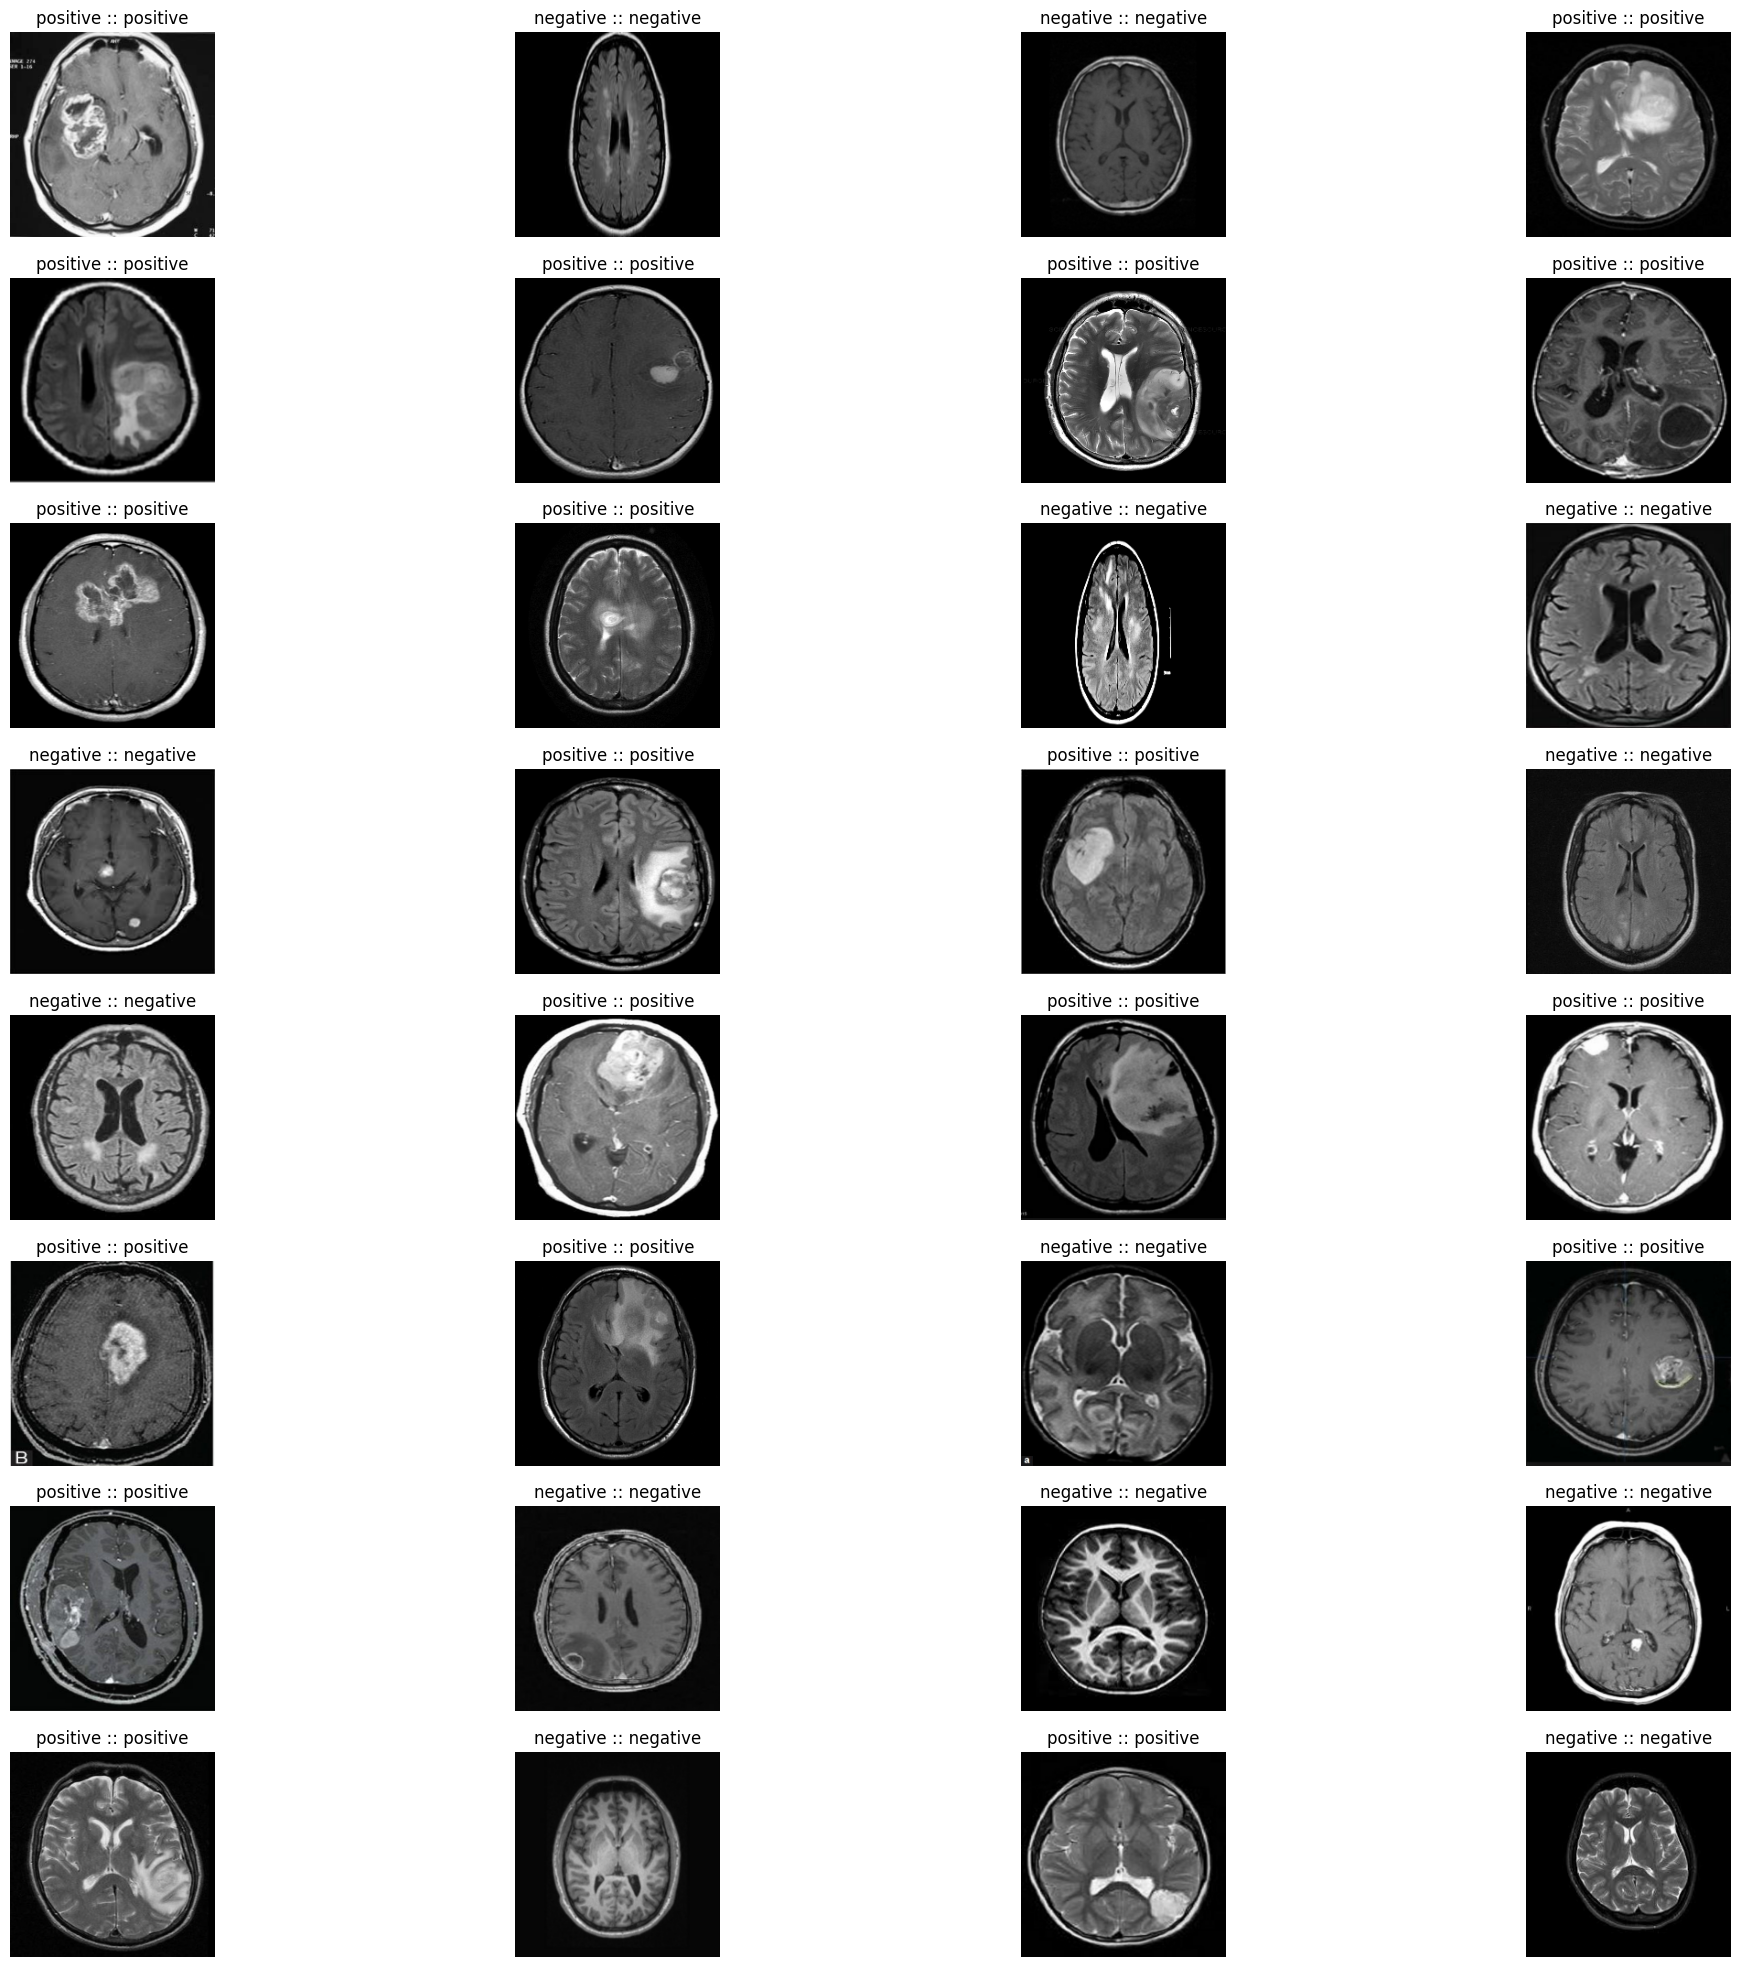

In [56]:
plt.figure(
    figsize=(25, 25)
)

for _ in range(32):
    ax = plt.subplot(
        8, 4, _ + 1
    )
    
    plt.imshow(
        x_val[_].astype("uint8")
    )

    plt.title(
        f'{class_names[y_val[_]]} :: {class_names[y_pred[_]]}'
    )

    plt.axis("off")

# Confusion matrix

## Import modules

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

## Matrix

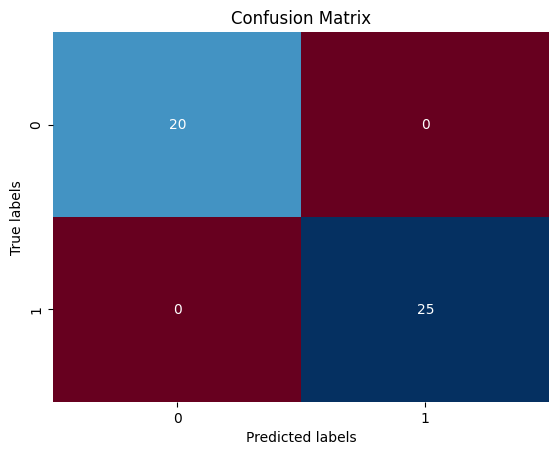

array([[20,  0],
       [ 0, 25]])

In [58]:
ax = plt.subplot()

matrix = confusion_matrix(
    y_val, y_pred
)

sns.heatmap(
    matrix,
    annot=True,
    fmt='g', ax=ax,
    cbar=False,
    cmap="RdBu"
)

ax.set_xlabel(
    "Predicted labels"
)
ax.set_ylabel(
    "True labels"
)

ax.set_title(
    "Confusion Matrix"
)

plt.savefig(
    '../output/confusion_matrix'
)

plt.show()

matrix

## Accuracy

In [59]:
acc = accuracy_score(
    y_val, y_pred
)

print(
    "Accuracy : {0:.2f}%".format(acc * 100)
)

Accuracy : 100.00%


# Saving models

Eng: We are going to save model for opencv cascade, and as keras model.

---

Ukr:  Ми збережемо модель для каскаду opencv і як модель keras.

## Keras

In [60]:
keras_model.save(
    "../output/models/keras/tumor_detection.keras"
)